**ML COURSE 2024-2025**
# LAB1: DATASETS ANALYSIS AND VISUALIZATION
**Part 1**
In this notebook we will see some concepts from Lecture #02 and Lecture #04.

#### Summary
- **Part 0**: Data Structures, introduction to NumPy, pandas, matplotlib and seaborn.
- **Part 1**: Datasets analysis, statistics and visualizations.
- **Part 2**: PCA from scratch

In [3]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Statistics with pandas

Load IRIS data

In [4]:
# load the iris.csv dataset in the folder drive/MyDrive/AA24-25ML
# there are many ways to load/download a dataset, we will see more in the future

iris_df = pd.read_csv('drive/MyDrive/AA24-25ML/iris.csv')

In [28]:
# print the shape of the dataset and display it
print("Shape of the dataset: ", iris_df.shape)
iris_df

Shape of the dataset:  (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The shape is (150,5). This means we have 150 rows and 5 columns.   
- Each row is a sample .
- Each column is a variable.  

### Analyze IRIS data with pandas

**Note**: the first 4 variables are numeric, while the last one is categorical (see table above). Since statistical moments are not define for categorical values, we need to split the data.

In [6]:
num_var_df = iris_df.drop(columns=['species'])             # drop the species column to get the numerical columns
cat_var_df = iris_df[['species']]                          # get only the 'species' column (categorical variable)

For numerical variables:

In [7]:
# for each variable (column) we can compute the statistics seen in class
mean_df = num_var_df.mean()             # mean of each column
var_df = num_var_df.var()               # variance of each column
std_df = num_var_df.std()               # standard deviation of each column = sqrt(variance)
skew_df = num_var_df.skew()             # skewness of each column
kurt_df = num_var_df.kurt()             # kurtosis of each column

Q1_df = num_var_df.quantile(0.25)       # first quartile, Q1, 25th percentile
median_df = num_var_df.quantile(0.50)   # MEDIAN, second quartile, Q2, 50th percentile
Q3_df = num_var_df.quantile(0.75)       # third quartile, Q3, 75th percentile
IQR_df = Q3_df - Q1_df                  # interquartile range, IQR = Q3 - Q1

corr_matrix = num_var_df.corr()         # Pearson correlation matrix

For the categorical variable:

In [8]:
mode_df_cat = cat_var_df.mode()    # mode of each column. In this case each category has the same number of samples, so they are all modes.

## Statistics with NumPy

### Load California Housing

In [9]:
cali_housing_df = pd.read_csv('drive/MyDrive/AA24-25ML/california_housing.csv')
cali_housing_df

# transform in numpy
cali_housing_np = cali_housing_df.to_numpy()
variable_names = cali_housing_df.columns            # get the variable names as the name of the columns

# print shape
print("Shape of the dataset: ", cali_housing_np.shape)

Shape of the dataset:  (20640, 8)


### Analyze California Housing with NumPy

All the variables are numerical so we can compute statistical moments for each one.

In [10]:
mean_np_c = np.mean(cali_housing_np, axis=0)         # mean of each column
var_np_c = np.var(cali_housing_np, axis=0)           # variance of each column
std_np_c = np.std(cali_housing_np, axis=0)           # standard deviation of each column = sqrt(variance)

# skweness and kurtosis not implemented in numpy. You should implement from scratch or use other libraries.

Q1_np_c = np.percentile(cali_housing_np, 25, axis=0, method="higher")       # first quartile, Q1, 25th percentile, the higher method is the one presented in class
median_np_c = np.percentile(cali_housing_np, 50, axis=0, method="higher")   # MEDIAN, second quartile, Q2, 50th percentile
Q3_np_c = np.percentile(cali_housing_np, 75, axis=0, method="higher")       # third quartile, Q3, 75th percentile
IQR_np_c = Q3_np_c - Q1_np_c                                                # interquartile range, IQR = Q3 - Q1

# mode not implemented in numpy. You should implement from scratch or use other libraries.

corr_matrix_np = np.corrcoef(cali_housing_np, rowvar=False)     # Pearson correlation matrix.
                                                                # Note: numpy, by assumes that each row is a variable
                                                                # and each column is a sample, but here we have the opposite
                                                                # so we need to specifiy it with rowvar=False

<span style="color:red"><strong>🏋️‍♀️ Exercise</strong></span>

Implement these functions and compare them with the `numpy` ones:
1. median
2. variance

Where by median we mean the value in middle, or the one next to it
$$
\text{element index} = floor(\frac{n}{2}) + 1
$$

$$
\text{median} = ordered\_array[element\_index]
$$

And variance is:
$$
\text{variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

Where $\bar{x}$ is the mean of the array.

In [11]:
# your code here ...

**Note**: the variance computed with pandas is the sample variance (N-1 in the denominator), while with numpy is the population variance (N in the denominator).
You can specify the parameter 'ddof' in numpy to get the sample variance: np.var(X, axis=0, ddof=1)
However, the difference is negligible for large datasets (N large).

## Visualizations

### Correlation matrix

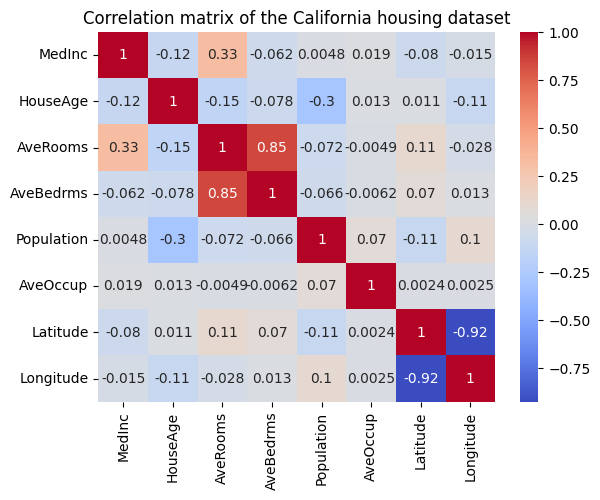

In [12]:
# plot correlation matrix of the california housing dataset using matplotlib
corr_matrix_cali = np.corrcoef(cali_housing_np, rowvar=False)

# plot with matplotlib and seaborn
sns.heatmap(corr_matrix_cali, annot=True, cmap='coolwarm', xticklabels=variable_names, yticklabels=variable_names)
plt.title('Correlation matrix of the California housing dataset')
plt.show()

### Histograms

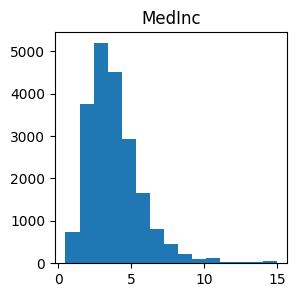

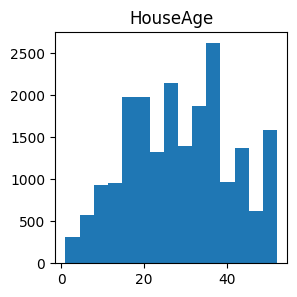

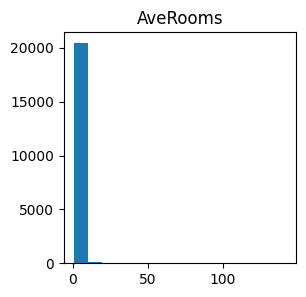

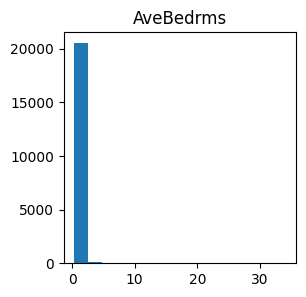

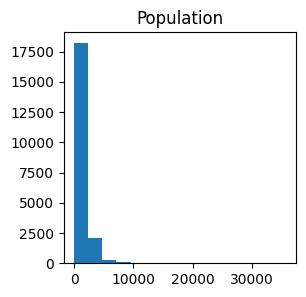

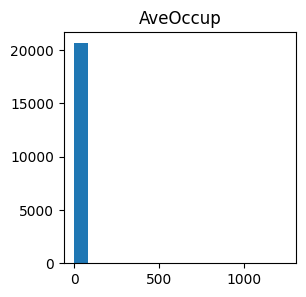

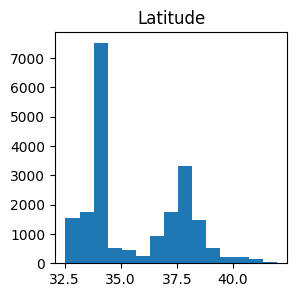

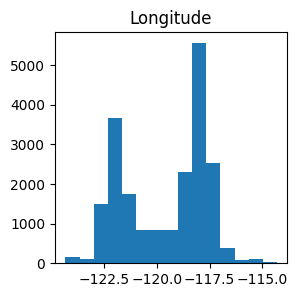

In [13]:
# histograms with numpy and matplotlib (california housing dataset)
for i in range(cali_housing_np.shape[1]):
    plt.figure(figsize=(3, 3))
    plt.hist(cali_housing_np[:,i], bins=15)
    plt.title(variable_names[i])
    plt.show()

array([[<Axes: title={'center': 'sepal length (cm)'}>,
        <Axes: title={'center': 'sepal width (cm)'}>],
       [<Axes: title={'center': 'petal length (cm)'}>,
        <Axes: title={'center': 'petal width (cm)'}>]], dtype=object)

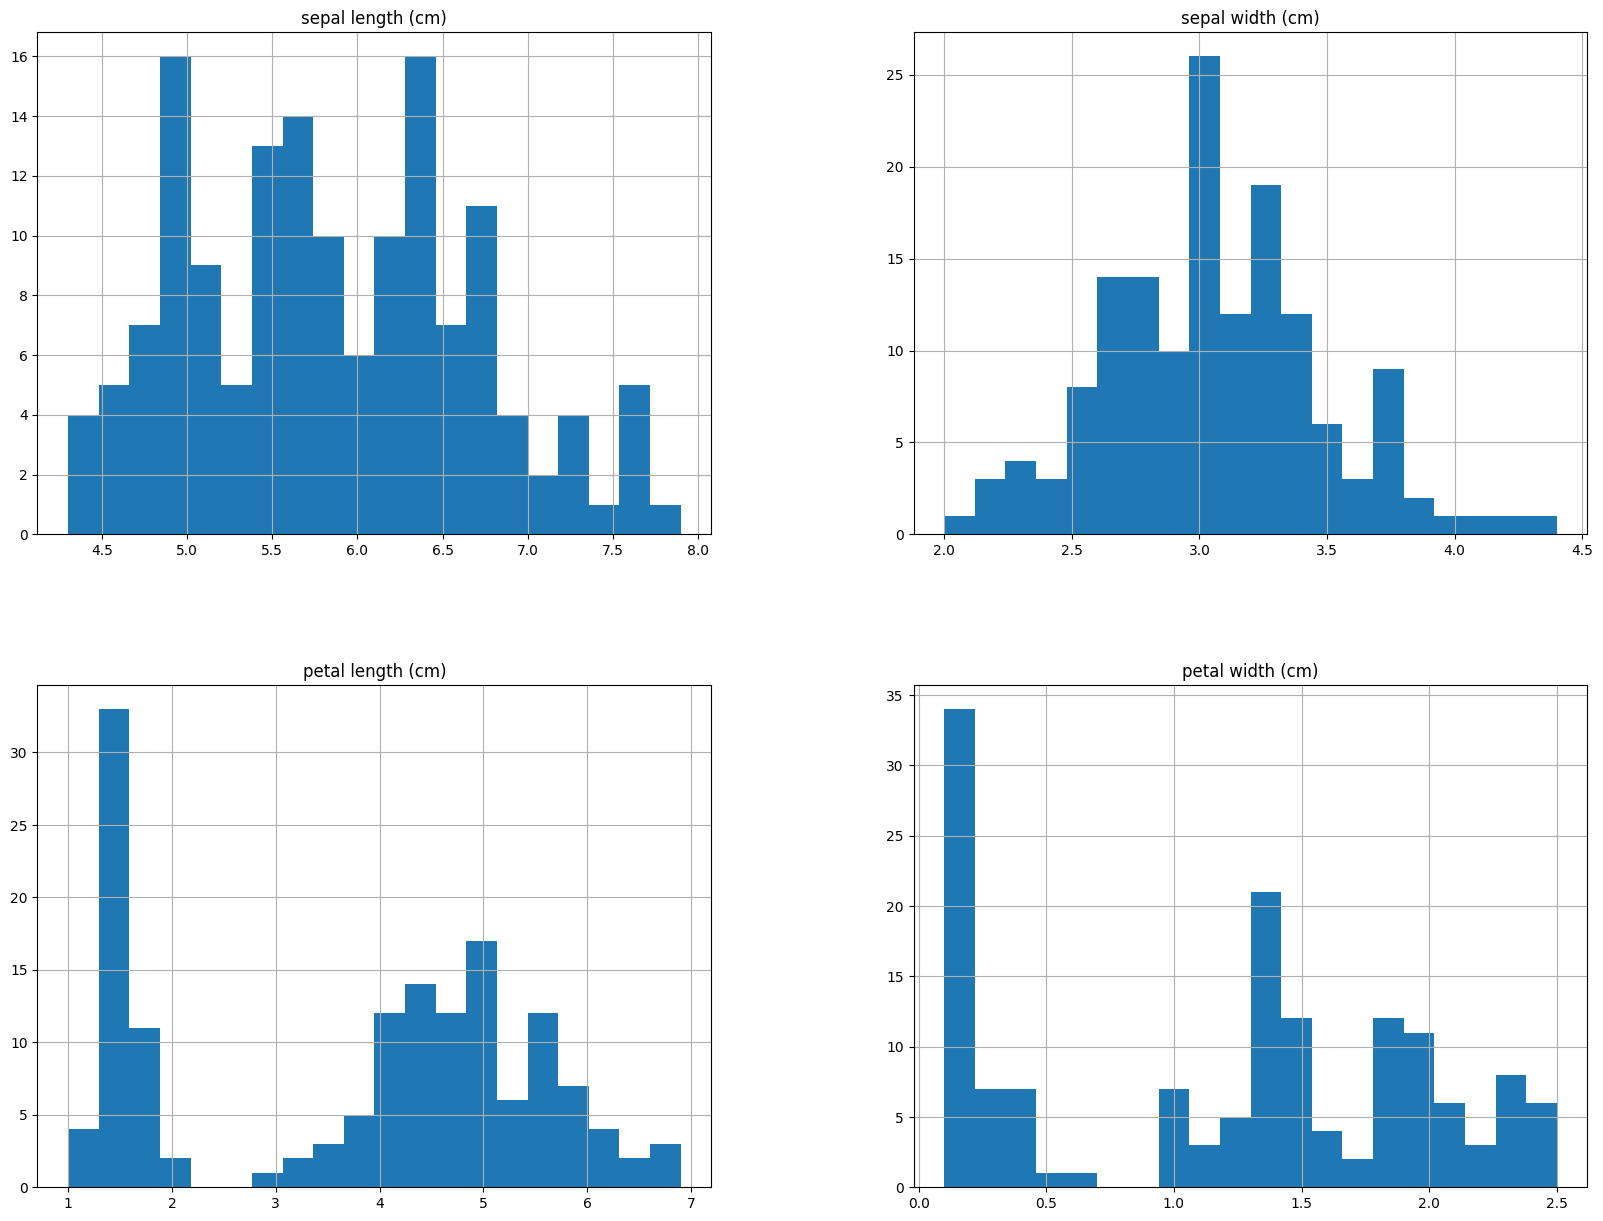

In [14]:
# histogram with pandas are quickest (iris dataset)
iris_df.hist(bins=20, figsize=(20,15))

### Barplots

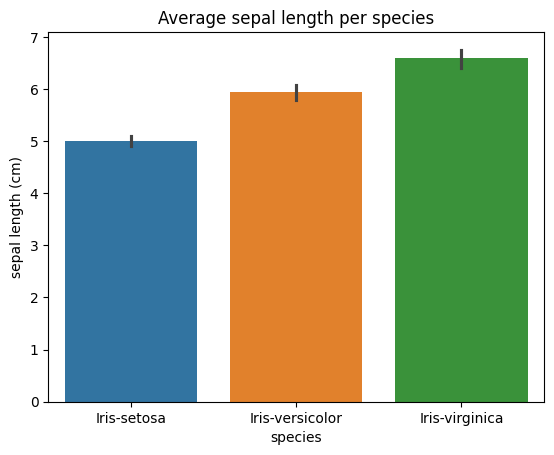

In [15]:
# plot the average sepal length per species with seaborn (iris dataset)
sns.barplot(x='species', y='sepal length (cm)', data=iris_df, hue='species')
plt.title('Average sepal length per species')
plt.show()

### Boxplots

🔍 How to read it?
1. Median (Q2, 50%): central line inside the box.
2. First quartile (Q1, 25%): start of the box.
3. Third quartile (Q3, 75%): end of the box.
4. Range (1.5*IQR): small horizonal lines, called 'whiskers'
5. Outliers: external circles.


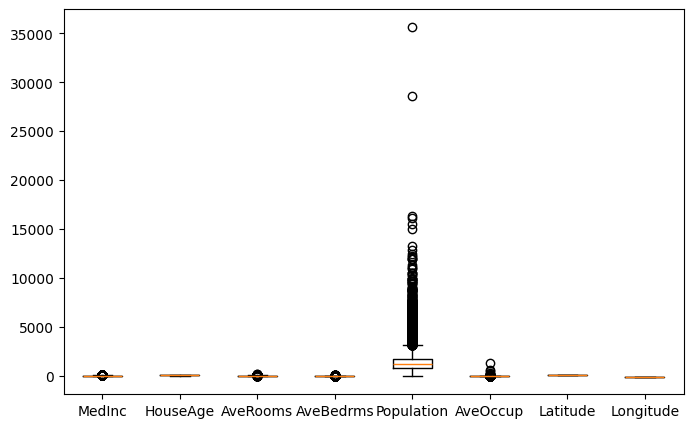

In [16]:
# boxplot with numpy and matplotlib
plt.figure(figsize=(8, 5))
plt.boxplot(cali_housing_np, tick_labels=variable_names)        # cali_housing_np is the numpy array from which we want the boxplot, while tick_labels set the labels of the x-axis
plt.show()

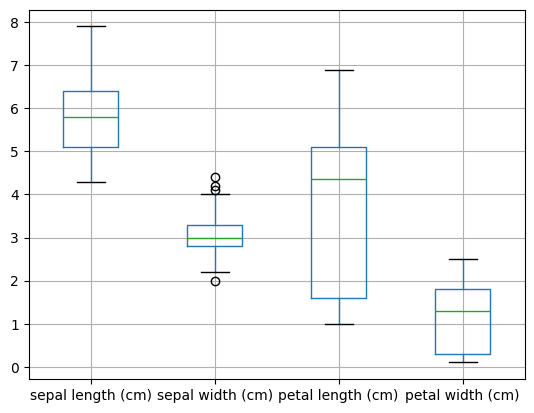

In [17]:
# boxplot with pandas on IRIS dataset
plt.figure()
num_var_df.boxplot()
plt.show()

### Pairplot

Useful to see if there are correlations between pairs of variables.

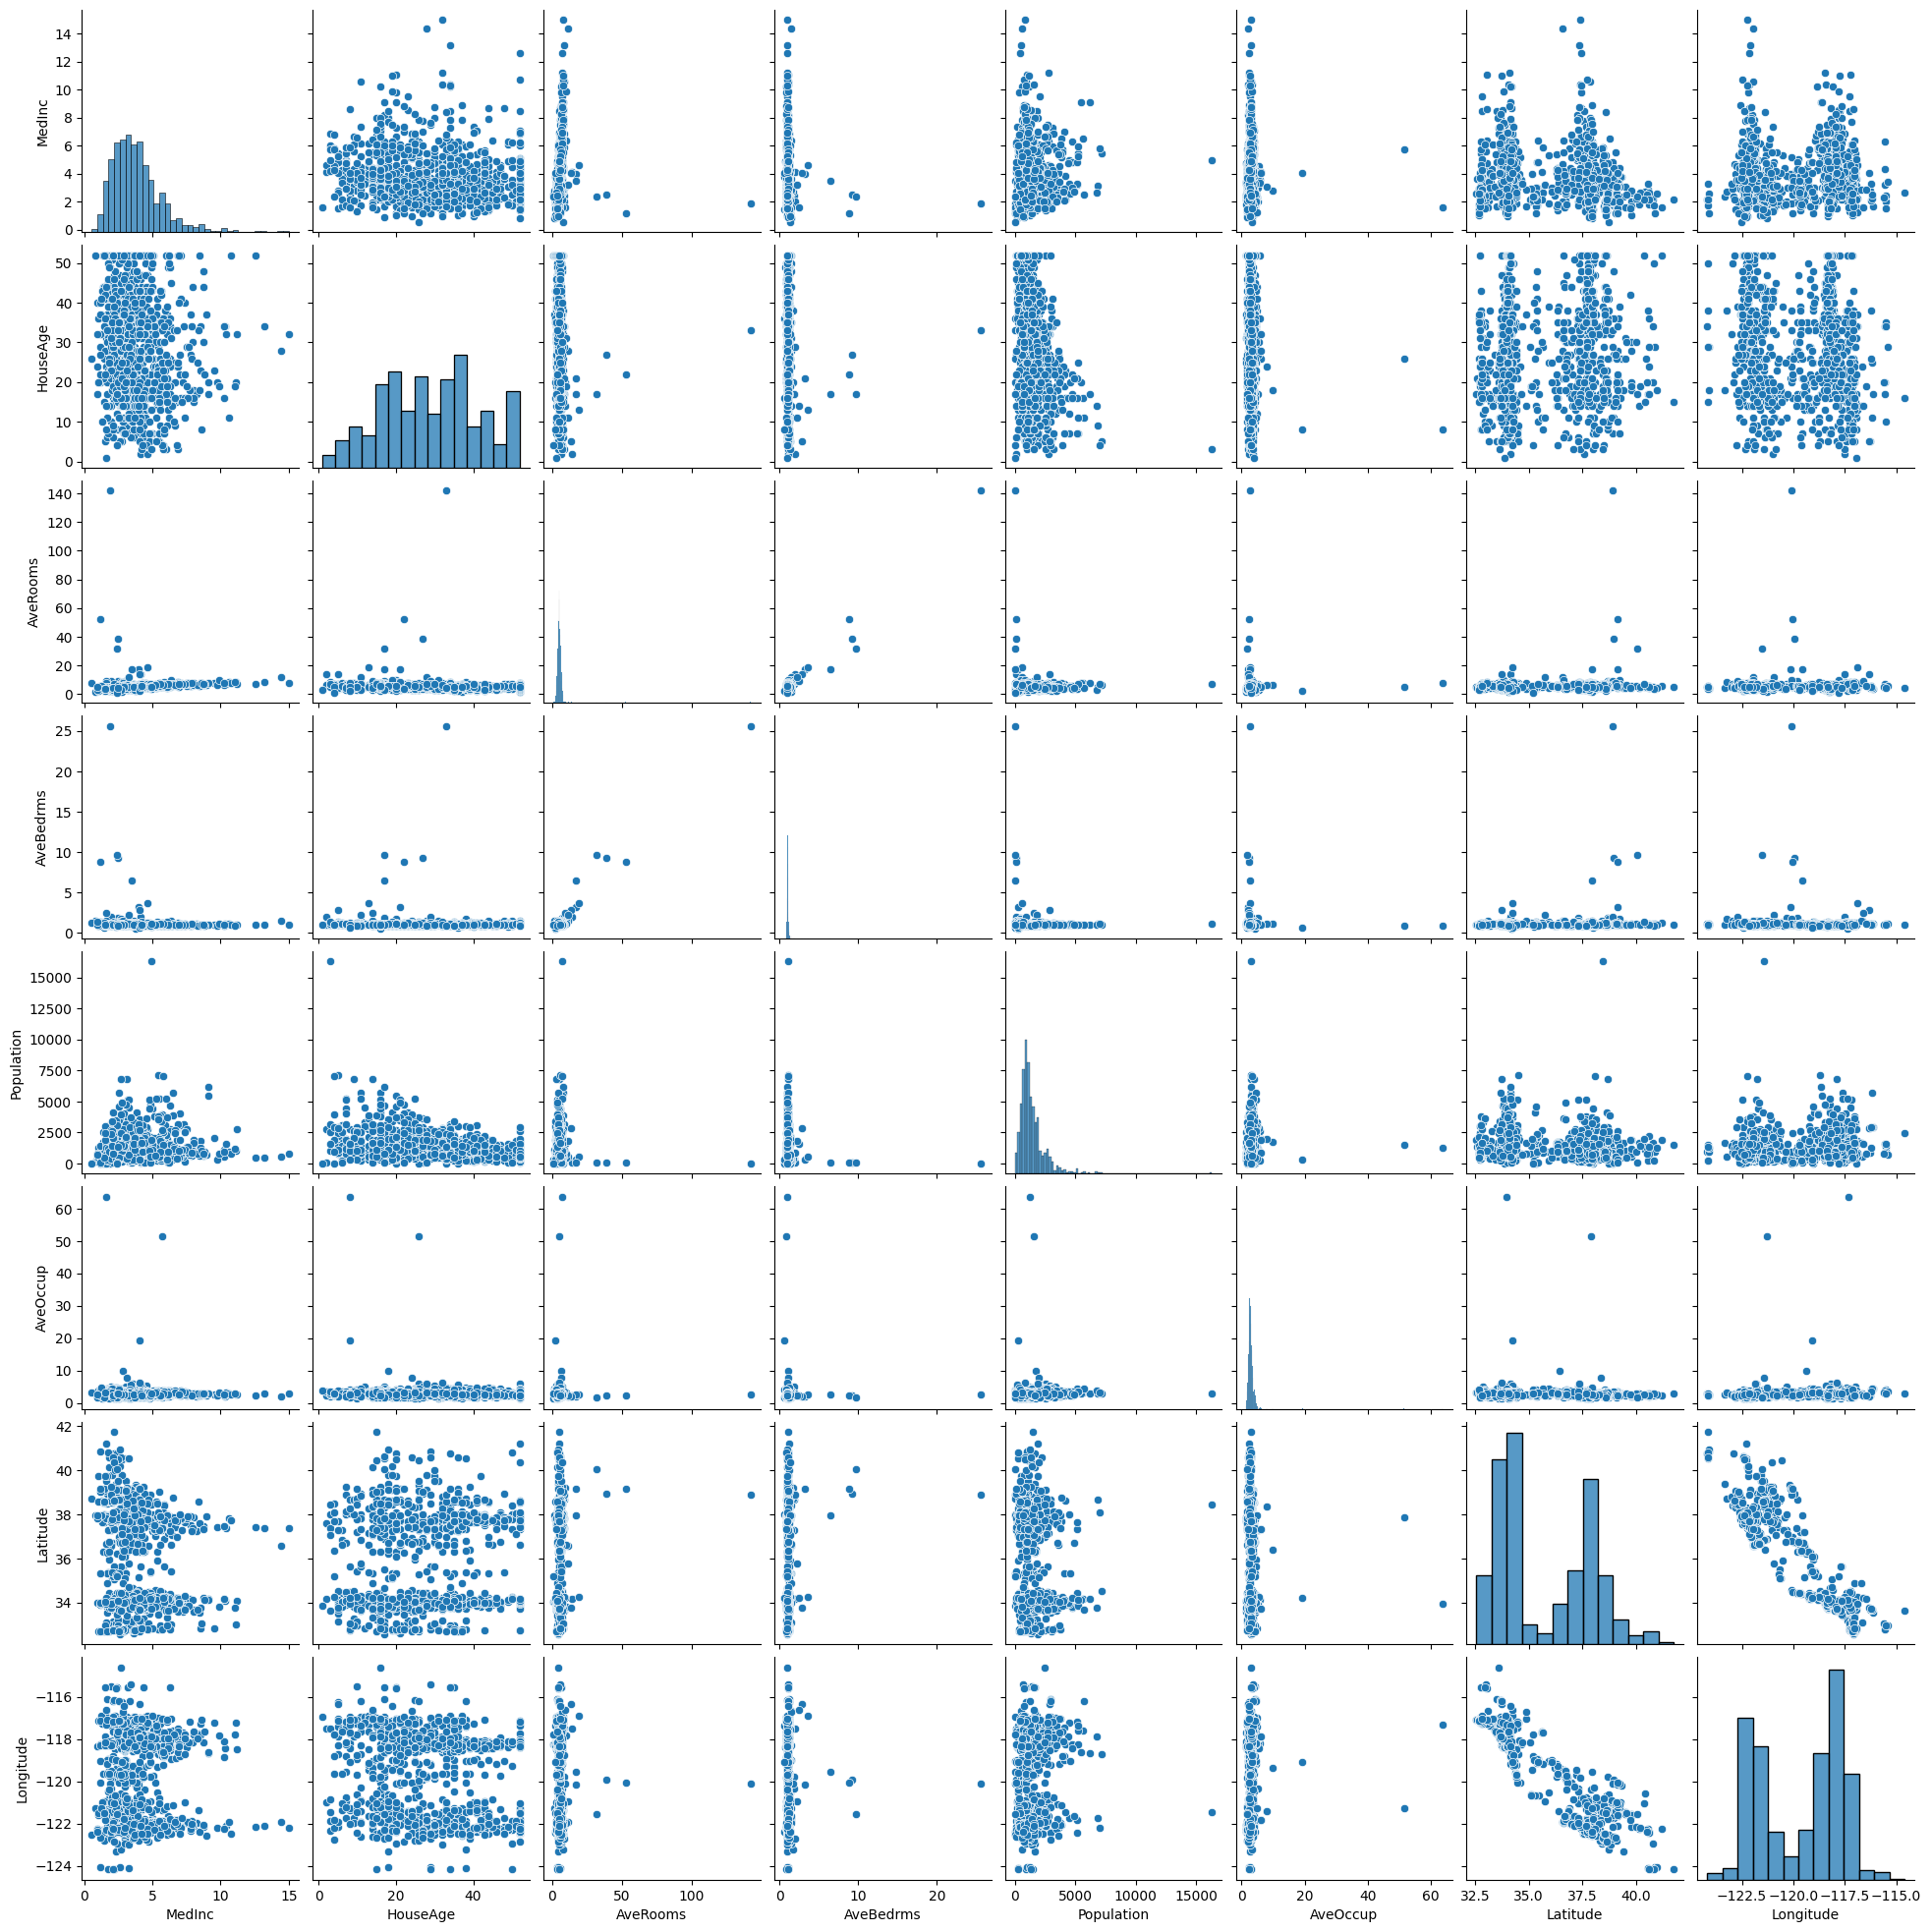

In [18]:
sns.pairplot(cali_housing_df.sample(1000))      # sample 1000 random rows to make the plot faster
plt.show()

<span style="color:red"><strong>🏋️‍♀️ Exercise</strong></span>

Choose two variables (columns) of the California Housing dataset. Plot the pairplot with KDE in the diagonal instead of the histograms.

You can use the [documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html) or use the help() function to search for the parameter to change.
Hint: look for 'kde'.

In [19]:
# your code here ...

## Optional: Load various Datasets from various filetypes

A dataset can be loaded from various filetypes, such as:
- `.csv` (comma separated values)
- `.npz` (numpy)
- `.mat` (matlab)
- `.wav` (audio)
- and many others.

Some datasets are already available in the `sklearn` library for instance, so you can load them directly.

In [20]:
import pandas as pd

# Load a .csv file with pandas
data = pd.read_csv('drive/MyDrive/AA24-25ML/iris.csv')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


`.npz` is a compressed file that can contain multiple numpy arrays. Access the arrays with the key like a dictionary.

In [21]:
import numpy as np

p = 'drive/MyDrive/AA24-25ML/gaussian_data.npz'
file_data = np.load(p)

# Print the keys of the dictionary
print(file_data.files)

['data', 'label']


In [22]:
# Print the first 10 elements of the data and label arrays
print("data array:", file_data['data'][:10])
print()
print("labels array:", file_data['label'][:10])

data array: [[ 0.38119824  1.59808656]
 [ 1.47130607  0.36511541]
 [ 0.1153228  -0.62016145]
 [-0.41363091 -0.12763049]
 [ 0.86401575 -0.12797528]
 [ 0.25313084 -3.80162124]
 [ 0.81191628 -0.50962248]
 [-0.11620147 -0.57486884]
 [ 0.3756261  -1.13708927]
 [-0.12627438  0.10160199]]

labels array: [1 0 0 1 1 0 1 0 0 0]


`.mat` is a matlab file that can contain multiple arrays. Access the arrays with the key like a dictionary.

In [23]:
import scipy.io

mat = scipy.io.loadmat('drive/MyDrive/AA24-25ML/data.mat')

# in this case we are interested in the keys of the dictionary that do not contain '__' in the name
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'x', 'y'])


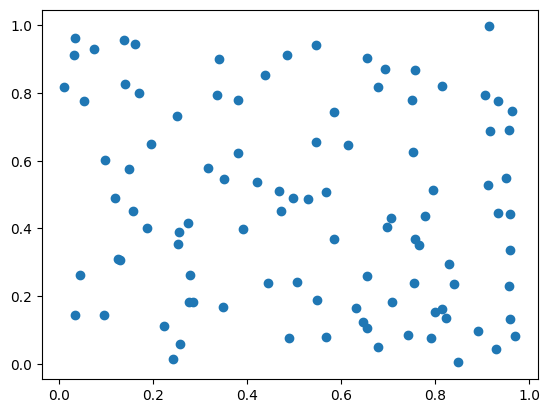

In [24]:
plt.scatter(mat["x"], mat["y"])

We can also use sklearn to download datasets.

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


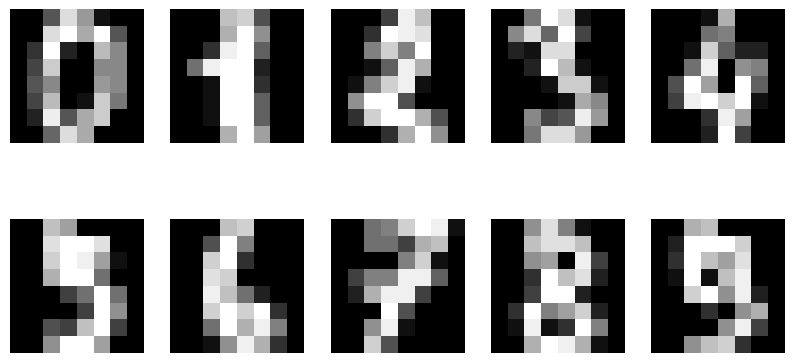

In [25]:
# We can use a library to import a dataset, for instance sklearn contains various toy datasets
from sklearn.datasets import load_digits

digits = load_digits()

# The dataset is a dictionary with keys:
print(digits.keys())

# Visualize the first 10 images
fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax[i//5, i%5].imshow(digits.images[i], cmap='gray')
    ax[i//5, i%5].axis('off')

`.wav` files are audio files, basically a 1D array.

In [26]:
from scipy.io import wavfile
from IPython.display import Audio


sample_rate, sound = wavfile.read('drive/MyDrive/AA24-25ML/sound.wav')

# Use jupyter notebook to listen to the sound
Audio(sound.T, rate=sample_rate)

<ipython-input-26-6e79d4a6915f>:5: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, sound = wavfile.read('drive/MyDrive/AA24-25ML/sound.wav')


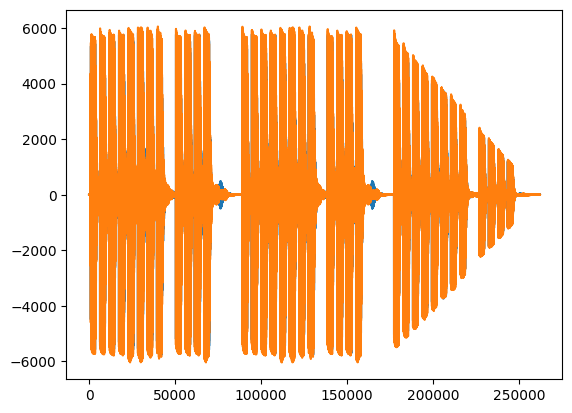

In [27]:
# And also plot the sound
plt.plot(sound)